# Self-supervised and multi-modal representation Learning: Notebook 4

Here we will give a quick example of processing images and text using a pre-trained CLIP (https://openai.com/research/clip) model. This model can be fine-tuned using custom (image, text) data pairs, using the loss function in the Notebook 2.

<img src=./assets/clip.png alt= “” width=1024>

- From https://openai.com/research/clip.

In [6]:
# ! pip install transformers

Example code from https://huggingface.co/docs/transformers/model_doc/clip.

In [8]:
from transformers import CLIPProcessor, CLIPModel, CLIPConfig
from PIL import Image
import requests

In [7]:
# Download and instantiate CLIP model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32", 
                                  cache_dir="/ocean/projects/phy230064p/shared/clip_weights")  # Download to shared dir, if not already downloaded

# Data processor
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

tokenizer_config.json: 100%|██████████| 568/568 [00:00<00:00, 2.83MB/s]
vocab.json: 100%|██████████| 862k/862k [00:00<00:00, 34.1MB/s]
merges.txt: 100%|██████████| 525k/525k [00:00<00:00, 47.9MB/s]
tokenizer.json: 100%|██████████| 2.22M/2.22M [00:00<00:00, 26.8MB/s]
special_tokens_map.json: 100%|██████████| 389/389 [00:00<00:00, 1.69MB/s]
config.json: 100%|██████████| 4.19k/4.19k [00:00<00:00, 19.5MB/s]


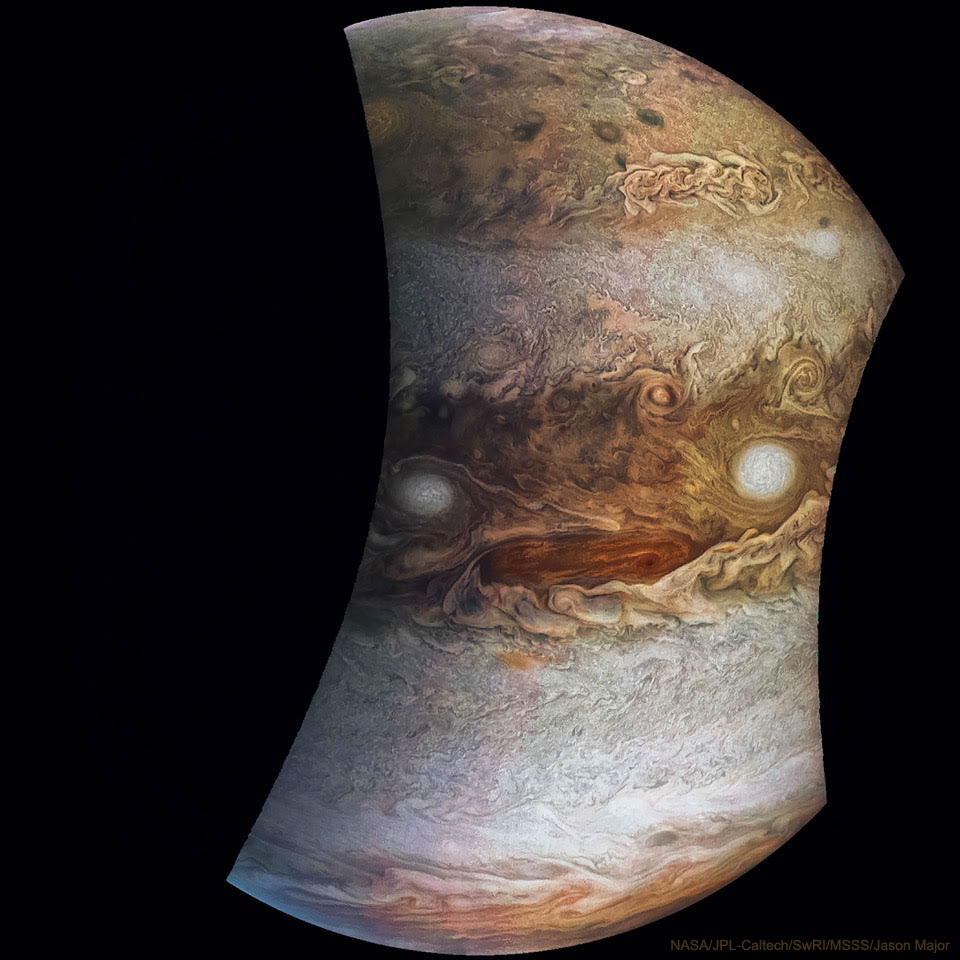

In [14]:
url = "https://apod.nasa.gov/apod/image/2106/Jovey_JunoMajor_960.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [47]:
text_cats = ["a photo of Jupiter", "a photo of Saturn", "a photo of Mars"]
inputs = processor(text=text_cats, images=image, return_tensors="pt", padding=True)

In [48]:
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

In [49]:
probs = probs.detach().numpy()[0]
probs

array([9.9461997e-01, 4.5625740e-03, 8.1741769e-04], dtype=float32)

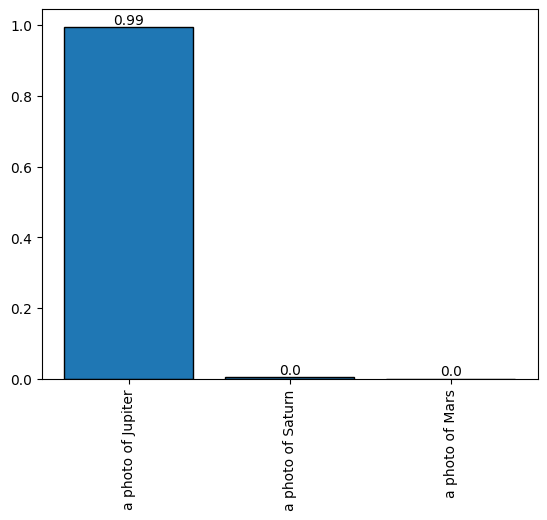

In [53]:
import matplotlib.pyplot as plt

bars = plt.bar(range(len(probs)), probs, edgecolor='black')

# Setting custom string labels as x-ticks and rotating them 90 degrees
plt.xticks(range(len(probs)), text_cats, rotation=90)

# Adding labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

In [54]:
## Text embeddings for the two 
outputs.text_embeds

tensor([[ 0.0070,  0.0450,  0.0534,  ..., -0.0161, -0.0010, -0.0370],
        [-0.0144,  0.0525,  0.0797,  ...,  0.0087, -0.0145, -0.0094],
        [ 0.0038,  0.0613,  0.0671,  ..., -0.0133, -0.0047, -0.0227]],
       grad_fn=<DivBackward0>)

In [55]:
outputs.image_embeds

tensor([[ 1.8069e-02, -5.9364e-03,  6.9549e-04,  2.8227e-02, -5.5459e-03,
         -1.2533e-04, -1.8131e-02,  1.6869e-02,  8.7602e-02,  2.8186e-02,
          1.3931e-02,  7.0340e-03,  3.8162e-02, -3.0907e-02, -2.1647e-02,
         -3.6210e-02,  1.3533e-02,  2.9373e-02,  2.9514e-02,  9.1716e-03,
          2.3907e-04, -2.7528e-02, -1.0889e-02, -1.6692e-02,  7.4723e-02,
          2.3278e-02,  1.6106e-02, -1.4491e-03, -7.1570e-02, -8.6177e-03,
          2.4190e-02,  3.0162e-02,  5.7999e-02, -1.9627e-02, -1.8595e-02,
          2.0574e-02,  2.7345e-02,  5.2420e-04,  2.8616e-02,  1.7615e-01,
         -1.4935e-02,  1.5319e-02,  1.1983e-02, -6.1130e-03, -2.3244e-02,
         -4.7746e-02,  1.1120e-03,  3.1458e-02,  7.8304e-03, -4.7883e-03,
          2.3359e-02,  1.0113e-02,  4.0772e-02, -9.3947e-03, -4.7686e-02,
          1.0784e-02, -6.1065e-02,  4.3031e-02, -1.0971e-02, -3.4805e-02,
          3.2654e-02, -4.2758e-02,  1.3762e-02, -7.5921e-02, -3.2827e-02,
          4.1564e-03, -7.0626e-03,  1.

You can fine-tune this model on custom image/text data using the code in the previous notebook, with some additional pieces of code you can find on efficiently creating text datasets.